1. What is the fundamental idea behind ensemble techniques? How does
bagging differ from boosting in terms of approach and objective?

  -> The fundamental idea of ensemble techniques is to combine multiple models to improve predictive accuracy and robustness, a concept known as the "wisdom of crowds". Bagging builds independent models in parallel from random data subsets to reduce variance, while boosting builds models sequentially, with each new model focusing on correcting the errors of the previous ones to reduce bias.

2. Explain how the Random Forest Classifier reduces overfitting compared to
a single decision tree. Mention the role of two key hyperparameters in this process.

  -> Random Forest reduces overfitting compared to a single decision tree through ensemble learning and randomization. A single decision tree can overfit by learning the training data too perfectly, including noise. Random Forest builds multiple decision trees, each trained on a different bootstrap sample (random subset with replacement) of the training data. Additionally, at each split in a tree, only a random subset of features is considered, further introducing diversity.

The final prediction is determined by majority voting (for classification) or averaging (for regression) across all individual trees. This aggregation process averages out the individual biases and variances of the overfitted trees, leading to a more robust and generalized model.

**Two key hyperparameters in this process are:**

**n_estimators:** This controls the number of decision trees in the forest. A higher number of estimators generally leads to a more stable and accurate model, further reducing variance and overfitting, but at the cost of increased computational time.

**max_features:** This determines the number of features to consider when looking for the best split at each node in a tree. Limiting this number (e.g., sqrt or log2 of total features) introduces randomness and reduces the correlation between individual trees, which is crucial for preventing overfitting and improving generalization.

3. What is Stacking in ensemble learning? How does it differ from traditional
bagging/boosting methods? Provide a simple example use case.

   -> Stacking, or stacked generalization, is an ensemble learning technique where the predictions of multiple diverse base models are used as input features to train a higher-level meta-model. The meta-model then learns to combine these predictions to make a final, more accurate prediction.

###**Difference from Bagging/Boosting:**

- **Heterogeneity:** Stacking typically uses heterogeneous base models (different algorithms like Decision Trees, SVMs, Logistic Regression), while Bagging and Boosting often use homogeneous weak learners (e.g., multiple Decision Trees).
- **Sequential vs. Parallel:** Bagging trains models in parallel, and Boosting trains them sequentially, each correcting errors of the previous one. Stacking, while the base models can be trained in parallel, uses a separate meta-model to learn how to combine their outputs.
- **Combination Method:** Bagging combines predictions by averaging or voting. Boosting combines them by weighted averaging based on performance. Stacking uses a trained meta-model to intelligently combine the base model predictions.

###**Simple Example Use Case:**

Imagine predicting house prices. You could train three base models: A Linear Regression model, A Random Forest model, and A Gradient Boosting Regressor.

Each of these models would make a prediction for a given house. In stacking, these three individual predictions (e.g., $300,000, $320,000, $310,000) would then become the input features for a final meta-model, such as another Linear Regression or a simpler Decision Tree. This meta-model learns how to weigh or combine the base model predictions to output a more refined final house price prediction.

4. What is the OOB Score in Random Forest, and why is it useful? How does
it help in model evaluation without a separate validation set?

   -> The Out-of-Bag (OOB) score is an internal, unbiased estimate of a Random Forest's performance on unseen data, calculated by using the samples that were not used to train each individual tree. It is useful because it validates the model without needing a separate validation set, saving data for training and providing a performance metric on par with an independent test set.  

###**How OOB works and why it's useful**

- **How it works:** When a Random Forest is built, each tree is trained on a bootstrap sample of the original data, which is sampling with replacement.
  - This means that, on average, about one-third of the original training samples are not used for each tree. These are the "out-of-bag" samples.
  - For OOB evaluation, the model uses the trees that did not see a specific out-of-bag sample during their training to make a prediction for that sample.
  - The final OOB score is calculated by comparing these predictions against the actual values for all out-of-bag samples.
- **Why it's useful:**
  - No need for a separate validation set: The OOB score provides an unbiased estimate of the model's generalization performance, similar to a validation score, but without sacrificing training data.
  - Internal and automatic validation: The model performs its own internal validation during training, making it efficient for evaluating performance.
  - True performance measure: Since the OOB samples are unseen by the trees used to make the prediction for them, the OOB score is a reliable indicator of how the model will perform on new, unseen data.

5. Compare AdaBoost and Gradient Boosting in terms of:

● How they handle errors from weak learners

● Weight adjustment mechanism

● Typical use cases

  -> AdaBoost and Gradient Boosting are both ensemble methods that sequentially combine weak learners to create a strong learner, but they differ in their mechanisms:
1. **How they handle errors from weak learners:**
- AdaBoost: Identifies shortcomings by focusing on misclassified data points. It increases the weights of incorrectly classified samples, ensuring subsequent weak learners prioritize learning from these difficult instances.
- Gradient Boosting: Identifies shortcomings by calculating the negative gradient of a loss function with respect to the current model's predictions (residuals). Subsequent weak learners are trained to predict these residuals, essentially correcting the errors of the previous models.
2. **Weight adjustment mechanism:**
- AdaBoost: Adjusts the weights of the training data instances. Misclassified samples receive higher weights, while correctly classified samples receive lower weights. It also assigns weights to the weak learners themselves based on their performance, influencing their contribution to the final prediction.
- Gradient Boosting: Does not directly adjust sample weights. Instead, it builds new weak learners that fit the residuals (the errors) of the previous models. Each new learner contributes to the overall model by reducing the residual error.
3. **Typical use cases:**
- AdaBoost: Primarily used for binary classification problems and is known for its ability to handle noisy data and resist overfitting, especially with simple weak learners like decision stumps.
- Gradient Boosting: More versatile and can be applied to a wider range of problems, including regression and multi-class classification. It often achieves high accuracy and is widely used in competitive machine learning, especially with more complex base learners like deeper decision trees.

6. Why does CatBoost perform well on categorical features without requiring
extensive preprocessing? Briefly explain its handling of categorical variables.

  -> CatBoost excels with categorical features due to its native, automatic handling without requiring manual preprocessing like one-hot encoding. It employs a technique called Ordered Target Statistics (or Ordered Boosting) to transform categorical variables into numerical ones during training, preventing target leakage and improving generalization.

##**Here's a brief explanation of its handling:**
- **Ordered Target Statistics:** CatBoost creates a numerical representation for each category by calculating the average target value of the samples before the current sample in a randomly permuted dataset. This "ordered" approach prevents the model from using information about the target from future samples, which would lead to data leakage and overfitting.
- **Permutation-Driven Encoding:** To further enhance robustness and avoid bias, CatBoost performs multiple random permutations of the dataset and calculates the ordered target statistics for each permutation. The final numerical value for a category is often an average of these statistics across different permutations.
- **Combinations of Categorical Features:** CatBoost can also automatically combine multiple categorical features, creating new, more expressive features that capture interactions between categories, leading to better model performance.

7.  KNN Classifier Assignment: Wine Dataset Analysis with
Optimization
Task:
   
   (1) Load the Wine dataset (sklearn.datasets.load_wine()).

In [1]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

# Load Wine dataset
wine = load_wine()
X, y = wine.data, wine.target

# Display dataset feature names and shape
print("Features:", wine.feature_names)
print("Shape:", X.shape)


Features: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Shape: (178, 13)


(2) Split data into 70% train and 30% test.

In [2]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)


(3) Train a KNN classifier (default K=5) without scaling and evaluate using:
a. Accuracy
b. Precision, Recall, F1-Score (print classification report)

In [3]:
knn_no_scaling = KNeighborsClassifier(n_neighbors=5)
knn_no_scaling.fit(X_train, y_train)

y_pred_no_scaling = knn_no_scaling.predict(X_test)

print("Accuracy without scaling:", accuracy_score(y_test, y_pred_no_scaling))
print("\nClassification Report (No Scaling):\n")
print(classification_report(y_test, y_pred_no_scaling))


Accuracy without scaling: 0.7222222222222222

Classification Report (No Scaling):

              precision    recall  f1-score   support

           0       0.89      0.89      0.89        18
           1       0.78      0.67      0.72        21
           2       0.50      0.60      0.55        15

    accuracy                           0.72        54
   macro avg       0.72      0.72      0.72        54
weighted avg       0.74      0.72      0.73        54



(4) Apply StandardScaler, retrain KNN, and compare metrics.

In [4]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_scaled = KNeighborsClassifier(n_neighbors=5)
knn_scaled.fit(X_train_scaled, y_train)

y_pred_scaled = knn_scaled.predict(X_test_scaled)

print("Accuracy with scaling:", accuracy_score(y_test, y_pred_scaled))
print("\nClassification Report (Scaled):\n")
print(classification_report(y_test, y_pred_scaled))


Accuracy with scaling: 0.9444444444444444

Classification Report (Scaled):

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      0.86      0.92        21
           2       0.83      1.00      0.91        15

    accuracy                           0.94        54
   macro avg       0.94      0.95      0.94        54
weighted avg       0.95      0.94      0.94        54



(5) Use GridSearchCV to find the best K (test K=1 to 20) and distance metric
(Euclidean, Manhattan).

In [5]:
param_grid = {
    'n_neighbors': list(range(1, 21)),
    'metric': ['euclidean', 'manhattan']
}

grid_search = GridSearchCV(
    KNeighborsClassifier(),
    param_grid,
    cv=5,
    scoring='accuracy'
)

grid_search.fit(X_train_scaled, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)


Best Parameters: {'metric': 'euclidean', 'n_neighbors': 11}
Best Cross-Validation Accuracy: 0.9756666666666666


(6) Train the optimized KNN and compare results with the unscaled/scaled versions.


In [6]:
# Train optimized model using best hyperparameters
best_knn = KNeighborsClassifier(
    n_neighbors=grid_search.best_params_['n_neighbors'],
    metric=grid_search.best_params_['metric']
)

best_knn.fit(X_train_scaled, y_train)
y_pred_best = best_knn.predict(X_test_scaled)

# Evaluate optimized model
accuracy_best = accuracy_score(y_test, y_pred_best)
print("Optimized KNN Accuracy:", accuracy_best)
print("\nClassification Report (Optimized KNN):\n")
print(classification_report(y_test, y_pred_best))


Optimized KNN Accuracy: 0.9629629629629629

Classification Report (Optimized KNN):

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      0.90      0.95        21
           2       0.88      1.00      0.94        15

    accuracy                           0.96        54
   macro avg       0.96      0.97      0.96        54
weighted avg       0.97      0.96      0.96        54



8. PCA + KNN with Variance Analysis and Visualization
Task:

(1)Load the Breast Cancer dataset (sklearn.datasets.load_breast_cancer()).


In [7]:
# Import required libraries
from sklearn.datasets import load_breast_cancer
import pandas as pd

# Load the dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Show shape and feature names
print("Features:", data.feature_names)
print("Dataset Shape:", X.shape)
print("Classes:", data.target_names)


Features: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Dataset Shape: (569, 30)
Classes: ['malignant' 'benign']


(2) Apply PCA and plot the scree plot (explained variance ratio).

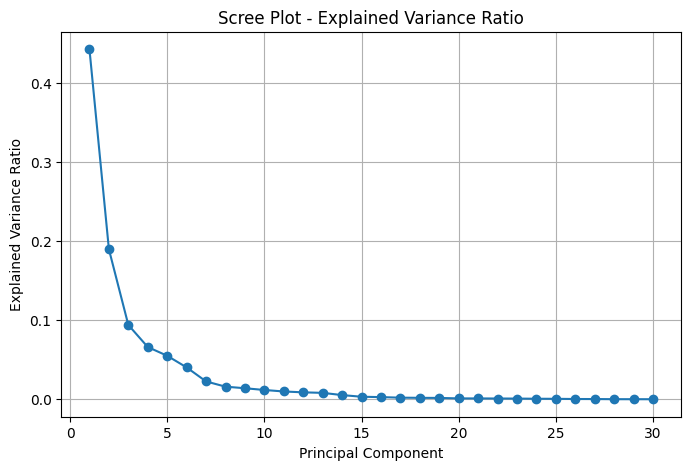

In [8]:
# ✅ PCA + Scree Plot for Breast Cancer Dataset

from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Load dataset
data = load_breast_cancer()
X = data.data

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA (keep all components)
pca = PCA()
pca.fit(X_scaled)

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_

# ✅ Scree plot
plt.figure(figsize=(8,5))
plt.plot(np.arange(1, len(explained_variance)+1),
         explained_variance,
         marker='o', linestyle='-')

plt.title("Scree Plot - Explained Variance Ratio")
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.grid(True)
plt.show()


(3) Retain 95% variance and transform the dataset.


In [9]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_breast_cancer

# Load dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA to retain 95% of variance
pca_95 = PCA(n_components=0.95)  # 95% variance
X_pca_95 = pca_95.fit_transform(X_scaled)

# Show results
print("Original shape:", X_scaled.shape)
print("Transformed shape (95% variance retained):", X_pca_95.shape)
print("Number of components selected:", pca_95.n_components_)


Original shape: (569, 30)
Transformed shape (95% variance retained): (569, 10)
Number of components selected: 10


(4) Train KNN on the original data and PCA-transformed data, then compare
accuracy.


In [10]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA - retain 95% variance
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

# Train-test split
X_train_orig, X_test_orig, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
X_train_pca, X_test_pca, _, _ = train_test_split(X_pca, y, test_size=0.3, random_state=42)

# KNN on original data
knn_orig = KNeighborsClassifier(n_neighbors=5)
knn_orig.fit(X_train_orig, y_train)
y_pred_orig = knn_orig.predict(X_test_orig)
print("Accuracy on Original Data:", accuracy_score(y_test, y_pred_orig))

# KNN on PCA-transformed data
knn_pca = KNeighborsClassifier(n_neighbors=5)
knn_pca.fit(X_train_pca, y_train)
y_pred_pca = knn_pca.predict(X_test_pca)
print("Accuracy on PCA Data:", accuracy_score(y_test, y_pred_pca))


Accuracy on Original Data: 0.9590643274853801
Accuracy on PCA Data: 0.9649122807017544


(5) Visualize the first two principal components using a scatter plot (color by class).

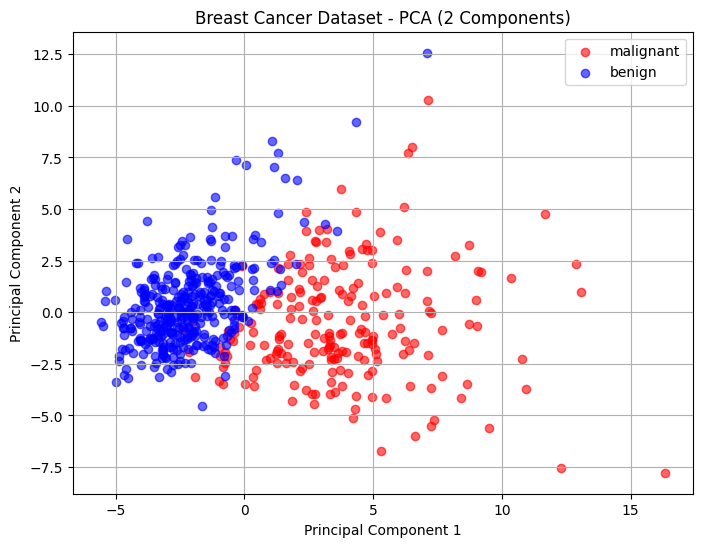

In [11]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_breast_cancer

# Load dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA with 2 components for visualization
pca_2 = PCA(n_components=2)
X_pca_2 = pca_2.fit_transform(X_scaled)

# Scatter plot
plt.figure(figsize=(8,6))
for class_value, color, label in zip([0,1], ['red','blue'], data.target_names):
    plt.scatter(
        X_pca_2[y==class_value, 0],
        X_pca_2[y==class_value, 1],
        c=color, label=label, alpha=0.6
    )

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Breast Cancer Dataset - PCA (2 Components)")
plt.legend()
plt.grid(True)
plt.show()


9. KNN Regressor with Distance Metrics and K-Value
Analysis
Task:

(1) Generate a synthetic regression dataset
(sklearn.datasets.make_regression(n_samples=500, n_features=10)).

In [13]:
from sklearn.datasets import make_regression
import pandas as pd

# Generate synthetic regression data
X, y = make_regression(
    n_samples=500,       # number of data points
    n_features=10,        # number of features
    noise=0.0,          # noise level
    random_state=42      # reproducibility
)

# Convert to DataFrame for easier inspection
df_X = pd.DataFrame(X, columns=[f'Feature_{i+1}' for i in range(X.shape[1])])
df_y = pd.DataFrame(y, columns=['Target'])

# Display first few rows
print(df_X.head())
print(df_y.head())


   Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  Feature_6  \
0  -1.195883   0.444603   0.394672  -0.850520   1.669905   0.588578   
1  -0.245388  -0.753736   1.896793  -0.820682   0.822060   0.412781   
2  -1.121244   0.929410  -1.995532  -0.291759   0.290897   0.493560   
3   0.861636   0.139060   0.078143   1.026986  -0.816217  -0.563947   
4   0.324166  -0.130143  -0.310267   0.813510   0.681953   0.021004   

   Feature_7  Feature_8  Feature_9  Feature_10  
0  -1.224298  -0.138456  -0.580523   -0.209023  
1   0.787085  -0.974682   0.963376    1.158596  
2  -0.286794   0.997632  -0.059826    0.759515  
3   1.190549   2.165056   1.105900    0.212574  
4   1.098777  -0.217681   1.305479    0.825416  
       Target
0   58.593560
1  273.058212
2 -117.299334
3   79.527032
4  143.586231


(2) Train a KNN regressor with:

a. Euclidean distance (K=5)

b. Manhattan distance (K=5)

c. Compare Mean Squared Error (MSE) for both.


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Euclidean KNN
knn_euc = KNeighborsRegressor(n_neighbors=5, metric='euclidean')
knn_euc.fit(X_train, y_train)
mse_euc = mean_squared_error(y_test, knn_euc.predict(X_test))

# Manhattan KNN
knn_man = KNeighborsRegressor(n_neighbors=5, metric='manhattan')
knn_man.fit(X_train, y_train)
mse_man = mean_squared_error(y_test, knn_man.predict(X_test))

print(f"MSE Euclidean: {mse_euc:.2f}, MSE Manhattan: {mse_man:.2f}")


MSE Euclidean: 4600.79, MSE Manhattan: 5425.15


(3) Test K=1, 5, 10, 20, 50 and plot K vs. MSE to analyze bias-variance tradeoff.

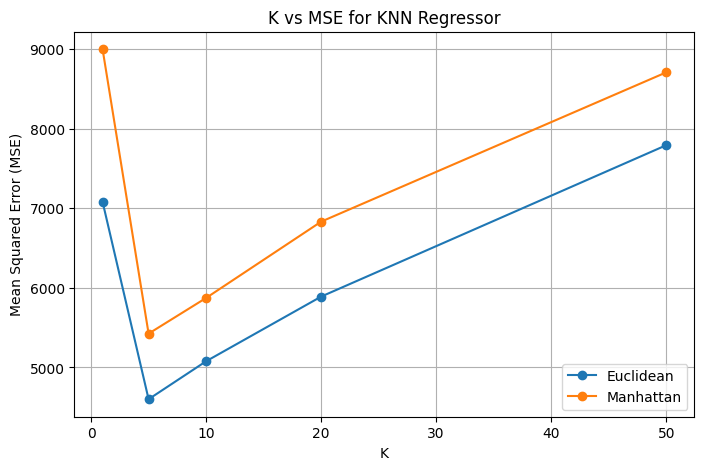

In [15]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# K values to test
k_values = [1, 5, 10, 20, 50]

mse_euclidean = []
mse_manhattan = []

for k in k_values:
    # Euclidean
    knn_euc = KNeighborsRegressor(n_neighbors=k, metric='euclidean')
    knn_euc.fit(X_train, y_train)
    mse_euclidean.append(mean_squared_error(y_test, knn_euc.predict(X_test)))

    # Manhattan
    knn_man = KNeighborsRegressor(n_neighbors=k, metric='manhattan')
    knn_man.fit(X_train, y_train)
    mse_manhattan.append(mean_squared_error(y_test, knn_man.predict(X_test)))

# Plot K vs MSE
plt.figure(figsize=(8,5))
plt.plot(k_values, mse_euclidean, marker='o', label='Euclidean')
plt.plot(k_values, mse_manhattan, marker='o', label='Manhattan')
plt.xlabel('K')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('K vs MSE for KNN Regressor')
plt.legend()
plt.grid(True)
plt.show()


10. KNN with KD-Tree/Ball Tree, Imputation, and Real-World
Data
Task:
(1) Load the Pima Indians Diabetes dataset (contains missing values).


In [16]:
import pandas as pd

# Load the dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
columns = [
    'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
    'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'
]
df = pd.read_csv(url, names=columns)

# Display the first few rows
print(df.head())


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


(2) Use KNN Imputation (sklearn.impute.KNNImputer) to fill missing values.

In [17]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer

# Load the dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
columns = [
    'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
    'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'
]
df = pd.read_csv(url, names=columns)

# Replace zeros with NaN in selected columns
cols_with_missing = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[cols_with_missing] = df[cols_with_missing].replace(0, np.nan)

# Apply KNN Imputer
imputer = KNNImputer(n_neighbors=5)  # You can adjust k
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Display first few rows after imputation
print(df_imputed.head())


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          6.0    148.0           72.0           35.0    169.0  33.6   
1          1.0     85.0           66.0           29.0     58.6  26.6   
2          8.0    183.0           64.0           25.8    164.6  23.3   
3          1.0     89.0           66.0           23.0     94.0  28.1   
4          0.0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction   Age  Outcome  
0                     0.627  50.0      1.0  
1                     0.351  31.0      0.0  
2                     0.672  32.0      1.0  
3                     0.167  21.0      0.0  
4                     2.288  33.0      1.0  


(3) Train KNN using:

a. Brute-force method

b. KD-Tree

c. Ball Tree


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Split features and target
X = df_imputed.drop('Outcome', axis=1)
y = df_imputed['Outcome']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# List of KNN algorithms
algorithms = ['brute', 'kd_tree', 'ball_tree']
results = {}

for algo in algorithms:
    # Initialize KNN classifier
    knn = KNeighborsClassifier(n_neighbors=5, algorithm=algo)
    knn.fit(X_train, y_train)

    # Predict and evaluate
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[algo] = acc
    print(f"Accuracy ({algo}): {acc:.4f}")

# Compare results
best_algo = max(results, key=results.get)
print(f"\nBest performing algorithm: {best_algo} with accuracy {results[best_algo]:.4f}")


Accuracy (brute): 0.7208
Accuracy (kd_tree): 0.7208
Accuracy (ball_tree): 0.7208

Best performing algorithm: brute with accuracy 0.7208


(4) Compare their training time and accuracy.

In [19]:
import time
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Split features and target
X = df_imputed.drop('Outcome', axis=1)
y = df_imputed['Outcome']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# KNN algorithms to compare
algorithms = ['brute', 'kd_tree', 'ball_tree']
results = {}

for algo in algorithms:
    knn = KNeighborsClassifier(n_neighbors=5, algorithm=algo)

    # Measure training time
    start_time = time.time()
    knn.fit(X_train, y_train)
    end_time = time.time()

    train_time = end_time - start_time
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)

    results[algo] = {'accuracy': acc, 'train_time': train_time}
    print(f"{algo.capitalize()} -> Accuracy: {acc:.4f}, Training time: {train_time:.4f} sec")

# Optional: summarize
print("\nSummary:")
for algo, metrics in results.items():
    print(f"{algo}: Accuracy={metrics['accuracy']:.4f}, Training Time={metrics['train_time']:.4f} sec")


Brute -> Accuracy: 0.7208, Training time: 0.0027 sec
Kd_tree -> Accuracy: 0.7208, Training time: 0.0026 sec
Ball_tree -> Accuracy: 0.7208, Training time: 0.0019 sec

Summary:
brute: Accuracy=0.7208, Training Time=0.0027 sec
kd_tree: Accuracy=0.7208, Training Time=0.0026 sec
ball_tree: Accuracy=0.7208, Training Time=0.0019 sec


(5) Plot the decision boundary for the best-performing method (use 2 most important features).


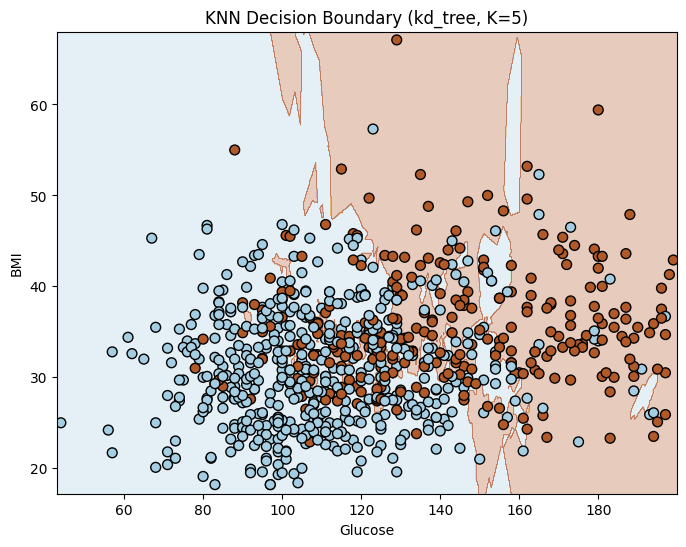

In [20]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

# Select 2 features (for example: 'Glucose' and 'BMI')
features = ['Glucose', 'BMI']
X_plot = df_imputed[features].values
y_plot = df_imputed['Outcome'].values

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_plot, y_plot, test_size=0.2, random_state=42)

# Train best-performing KNN (replace 'best_algo' with the algorithm you found best)
best_algo = 'kd_tree'  # for example
knn = KNeighborsClassifier(n_neighbors=5, algorithm=best_algo)
knn.fit(X_train, y_train)

# Create a meshgrid for plotting
x_min, x_max = X_plot[:, 0].min() - 1, X_plot[:, 0].max() + 1
y_min, y_max = X_plot[:, 1].min() - 1, X_plot[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Predict on meshgrid
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)
plt.scatter(X_plot[:, 0], X_plot[:, 1], c=y_plot, s=50, edgecolor='k', cmap=plt.cm.Paired)
plt.xlabel(features[0])
plt.ylabel(features[1])
plt.title(f"KNN Decision Boundary ({best_algo}, K=5)")
plt.show()
